##### *Importing libraries*

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as spy

##### *Loading the dataset*

In [3]:
df = pd.read_csv('yulu.csv')

 ##### *Basic Exploration*

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [6]:
# Checking the shape of data
df.shape

(10886, 12)

In [7]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

#### *Column Profiling*:
 -	`datetime`: datetime
 -	`season`: season (1: spring, 2: summer, 3: fall, 4: winter)
 -	`holiday`: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
 -	`workingday`: if day is neither weekend nor holiday is 1, otherwise is 0.
 -	`weather`:
  -	1: Clear, Few clouds, partly cloudy, partly cloudy
  -	2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  -	3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  -	4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
 -	`temp`: temperature in Celsius
 -	`atemp`: feeling temperature in Celsius
 -	`humidity`: humidity
 -	`windspeed`: wind speed
 -	`casual`: count of casual users
 -	`registered`: count of registered users
 -	`count`: count of total rental bikes including both casual and registered

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
# Checking for nulls in the data
np.any(df.isnull())

False

In [10]:
# Checking for any duplicates in the data
np.any(df.duplicated())

False

*Insights :*
- The given data has 10886 rows and 12 columns
- There are no null values in the data, hence no missing value treatment is required.
- There are no duplicated rows in the data.

#### *Preprocessing the data*

In [11]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

There are a few categorical columns like season, holiday, workingday, weather that are represented in numerical terms whose data types need to be changed from 'int64' to 'category' datatype. And datetime column's datatype needs to be converted from 'object' to 'datetime' to make the data more accessible. Datatypes for columns like casual, registered and count can be changed from 'int64' to 'int32' and the temp and atemp columns can be changed from 'float64' to 'float32'. These conversions can also help with `memory optimization` by reducing usage.

In [12]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [13]:
df['season'] = df["season"].astype('category')
df['holiday'] = df["holiday"].astype('category')
df['workingday'] = df["workingday"].astype('category')
df['weather'] = df["weather"].astype('category')

In [14]:
df['temp'] = df["temp"].astype('float32')
df['atemp'] = df["atemp"].astype('float32')
df['windspeed'] = df["windspeed"].astype('float32')

In [15]:
df['humidity'] = df["humidity"].astype('int32')
df['casual'] = df["casual"].astype('int32')
df['registered'] = df["registered"].astype('int32')
df['count'] = df["count"].astype('int32')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float32       
 6   atemp       10886 non-null  float32       
 7   humidity    10886 non-null  int32         
 8   windspeed   10886 non-null  float32       
 9   casual      10886 non-null  int32         
 10  registered  10886 non-null  int32         
 11  count       10886 non-null  int32         
dtypes: category(4), datetime64[ns](1), float32(3), int32(4)
memory usage: 426.0 KB


As we can observe, the memory usage has been dropped drastically from 1020.7 KB to 426.0 KB. And the column datatypes have been changed to make analyzing the data easier.

In [17]:
df['day'] =  df['datetime'].dt.day_name()

In [18]:
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time

In [19]:
df['month'] =  df['datetime'].dt.month_name()

Creating day, date and time columns can make it easier for us to access the data in terms of dates and days as well as time for better filtering and manipulation.

In [20]:
# renaming values in season column
def seasons(x):
    if x==1: return 'spring'
    elif x==2: return 'summer'
    elif x==3: return 'fall'
    else: return 'winter'

df['season'] = df['season'].apply(seasons)

#### *Non-Graphical Analysis*

In [21]:
print('first day:',df['date'].min())
print('last day:',df['date'].max())
print(df['date'].max()-df['date'].min())

first day: 2011-01-01
last day: 2012-12-19
718 days, 0:00:00


The data we have been provided with starts on 01-01-2011 and ends on 19-12-2012 spanning across 718 days. And it is provided in a 24 hour format.

In [22]:
df['season'].value_counts()

season
winter    2734
summer    2733
fall      2733
spring    2686
Name: count, dtype: int64

We can observe that the four mentioned seasons have almost equal proportions in the data .

In [23]:
df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

There are a total of 311 holidays in the data denoted by '1'.

In [24]:
df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

There are roughly 68% working days and 32% non-working days that may include weekends and holidays in the data

In [25]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

Out of the 4 different weathers mentioned, weather 1 is the most frequent weather and weather 4 is the least frequent.

In [26]:
df['day'].value_counts()

day
Saturday     1584
Sunday       1579
Thursday     1553
Monday       1551
Wednesday    1551
Tuesday      1539
Friday       1529
Name: count, dtype: int64

For every day of the week, the count seems to be almost equal.

#### *Statistical Analysis*

In [27]:
df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.230862,23.655085,61.886460,12.799396,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.940000,16.665001,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.500000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.240000,31.059999,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.000000,45.455002,100.000000,56.996899,367.000000,886.000000,977.000000
std,NaN,7.791590,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


*Insights*:
- We can see that there are 10886 rows present in the data.
- Average temerature observed is about 20 degrees Celcius, with minimum being 0.82 degrees and maximum being 41 degrees.
- The average for feeling temperature is 24 degrees Celcius.
- Average humidity is around 62, and maximum humidity reaching around 100.
- Windspeed average is 12.99.
- Maximum number of casual customers in a day were 367. On an average there are 36 customers using Yulu.
- Maximum number of registered customers in a day were 886. On an average there are 155 customers using Yulu.

From above data we can see how the variables are correlated to each other.

#### *Visual Analysis*

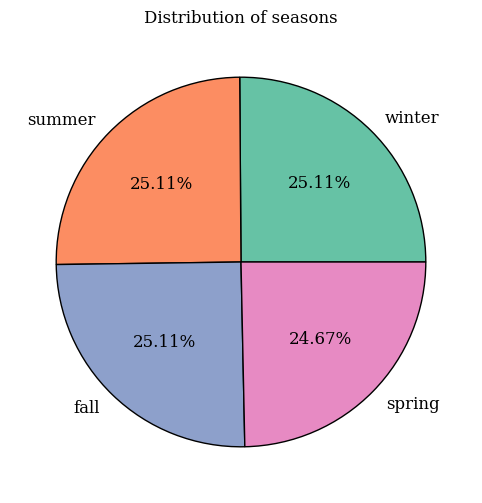

In [28]:
df_season = np.round(df['season'].value_counts(normalize = True) * 100, 2).to_frame()
plt.figure(figsize = (8,6))
colors = sns.color_palette("Set2")
plt.pie(x = df_season['proportion'], labels = df_season.index, autopct = '%.2f%%', colors=colors,
       wedgeprops = {"edgecolor" : "black", 'linewidth': 1, 'antialiased': True},
       textprops = {'fontsize' : 12, 'fontfamily' : 'serif', 'fontweight' : 100})
plt.title('Distribution of seasons',fontdict={'fontfamily':'serif'})
plt.show()

All the seasons have almost equal propportion in the data.

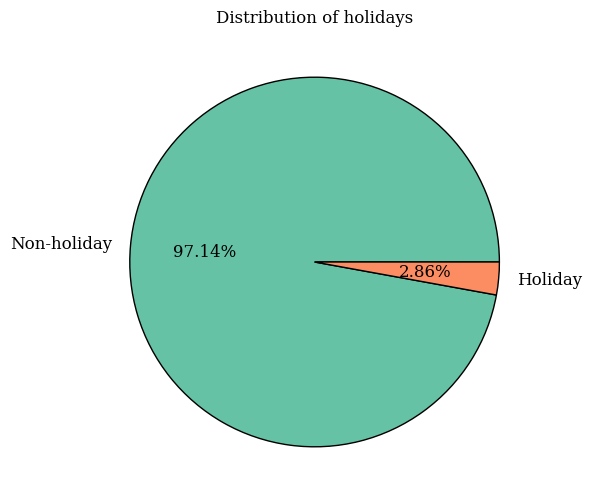

In [29]:
df_holiday = np.round(df['holiday'].value_counts(normalize = True) * 100, 2).to_frame()
plt.figure(figsize = (8,6))
colors = sns.color_palette("Set2")
plt.pie(x = df_holiday['proportion'], labels = ['Non-holiday','Holiday'], autopct = '%.2f%%', colors=colors,
       wedgeprops = {"edgecolor" : "black", 'linewidth': 1, 'antialiased': True},
       textprops = {'fontsize' : 12, 'fontfamily' : 'serif', 'fontweight' : 100})
plt.title('Distribution of holidays',fontdict={'fontfamily':'serif'})
plt.show()

As expected, the non-holiday days are about 97.14% and holidays are only 2.86% in the data.

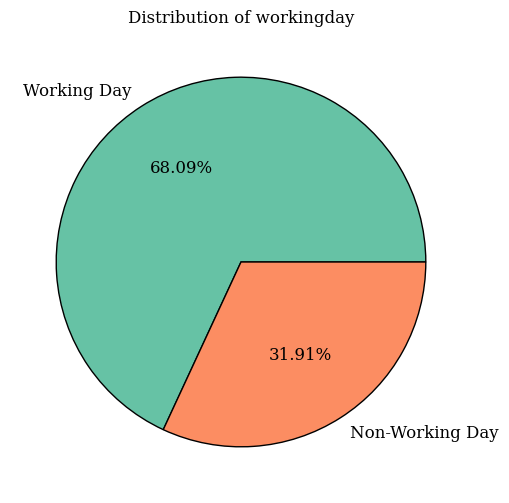

In [30]:
df_workingday = np.round(df['workingday'].value_counts(normalize = True) * 100, 2).to_frame()

plt.figure(figsize = (8,6))
colors = sns.color_palette("Set2")
plt.pie(x = df_workingday['proportion'], labels = ['Working Day', 'Non-Working Day'], autopct = '%.2f%%', colors=colors,
       wedgeprops = {"edgecolor" : "black", 'linewidth': 1, 'antialiased': True},
       textprops = {'fontsize' : 12, 'fontfamily' : 'serif', 'fontweight' : 100})
plt.title('Distribution of workingday',fontdict={'fontfamily':'serif'})
plt.show()

There are arounf 68.09% working days and 31.91% non working days in the data.

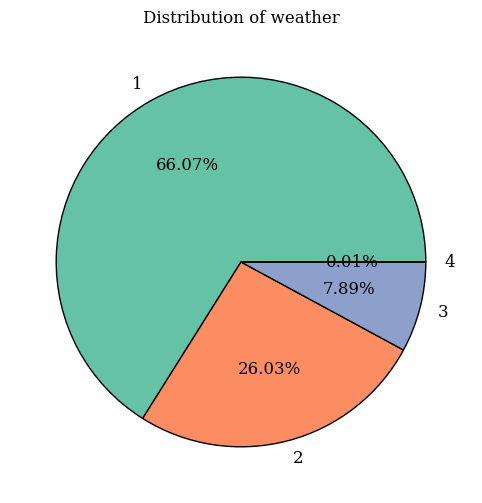

In [31]:
df_weather = np.round(df['weather'].value_counts(normalize = True) * 100, 2).to_frame()

plt.figure(figsize = (8,6))
colors = sns.color_palette("Set2")
plt.pie(x = df_weather['proportion'], labels = df_weather.index , autopct = '%.2f%%', colors=colors,
       wedgeprops = {"edgecolor" : "black", 'linewidth': 1, 'antialiased': True},
       textprops = {'fontsize' : 12, 'fontfamily' : 'serif', 'fontweight' : 100})
plt.title('Distribution of weather',fontdict={'fontfamily':'serif'})
plt.show()

Weather 1 has almost 66.07% proportion making up majority of the data with regards to weather. And weather 4 takes up only 0.01% of the data. 

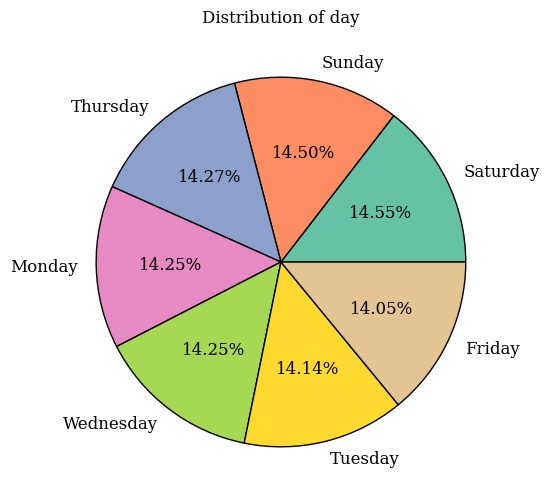

In [32]:
df_day = np.round(df['day'].value_counts(normalize = True) * 100, 2).to_frame()

plt.figure(figsize = (8,6))
colors = sns.color_palette("Set2")
plt.pie(x = df_day['proportion'], labels = df_day.index , autopct = '%.2f%%', colors=colors,
       wedgeprops = {"edgecolor" : "black", 'linewidth': 1, 'antialiased': True},
       textprops = {'fontsize' : 12, 'fontfamily' : 'serif', 'fontweight' : 100})
plt.title('Distribution of day',fontdict={'fontfamily':'serif'})
plt.show()

We can incur that the data is almost equally distributed among every day of the week. Each day makes up roughly 14% of the data.

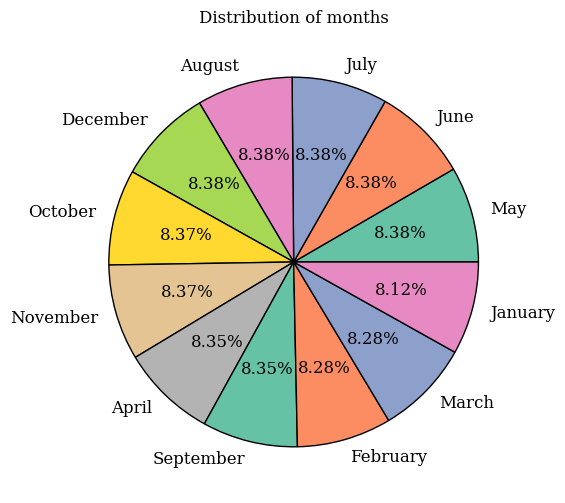

In [33]:
df_month = np.round(df['month'].value_counts(normalize = True) * 100, 2).to_frame()

plt.figure(figsize = (8,6))
colors = sns.color_palette("Set2")
plt.pie(x = df_month['proportion'], labels = df_month.index , autopct = '%.2f%%', colors=colors,
       wedgeprops = {"edgecolor" : "black", 'linewidth': 1, 'antialiased': True},
       textprops = {'fontsize' : 12, 'fontfamily' : 'serif', 'fontweight' : 100})
plt.title('Distribution of months',fontdict={'fontfamily':'serif'})
plt.show()

We can observe that each month makes up almost equal proportion of the data.

In [34]:
ndf = pd.read_csv('yulu.csv')

In [35]:
corr_df = ndf.corr(numeric_only=True)
corr_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


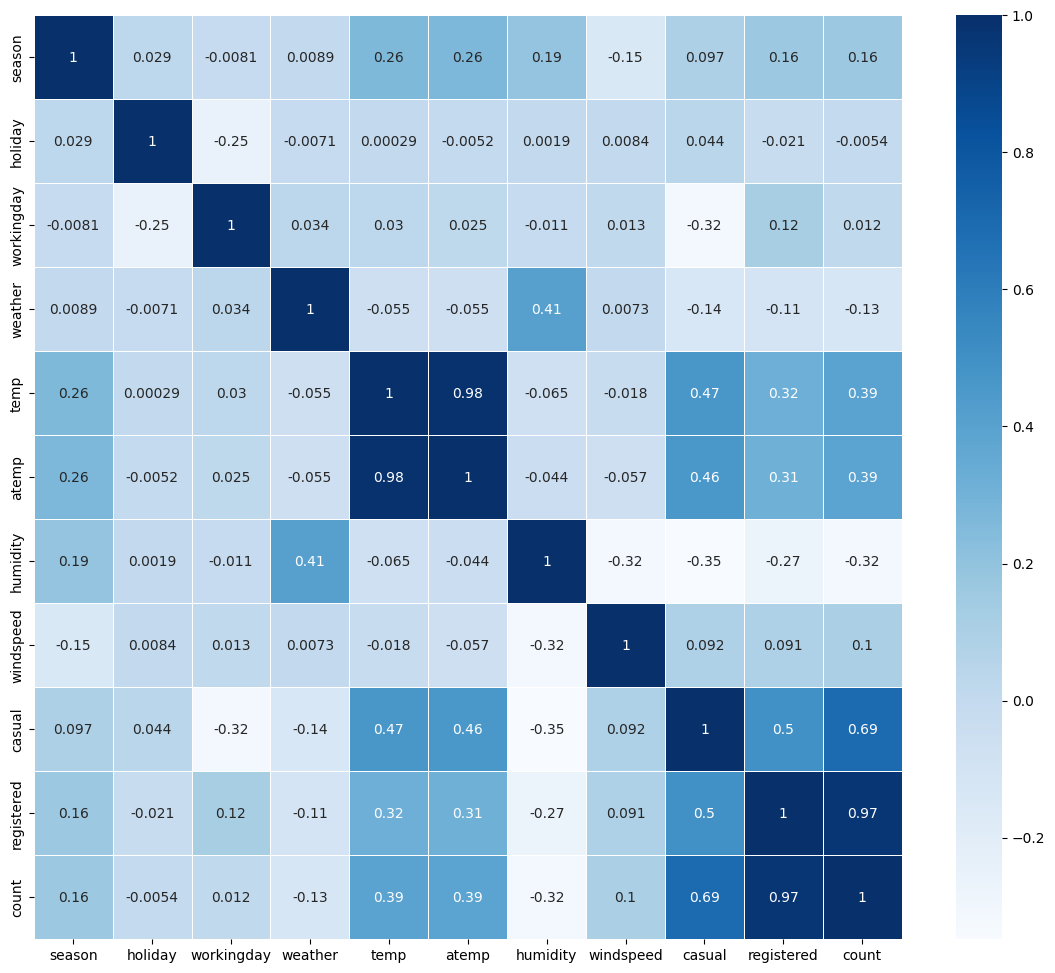

In [36]:
plt.figure(figsize=(14,12))
sns.heatmap(ndf.corr(numeric_only=True), linewidths=0.5, annot=True, cmap = 'Blues')
plt.show()

#### *Graphical Analysis*

- *Univariate Analysis*

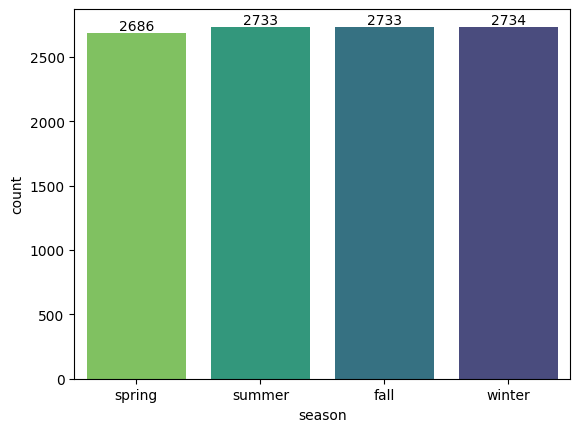

In [37]:
ax = sns.countplot(data=df, x='season', palette = 'viridis_r')
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
plt.show()

There's most count of users for winter season and least count for spring season as observed.

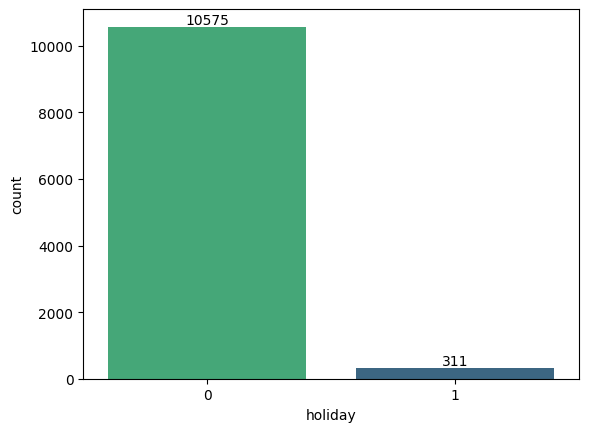

In [38]:
ax = sns.countplot(data=df, x='holiday', palette = 'viridis_r')
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
plt.show()

There are 10575 non-holidays and 311 holidays in the data.

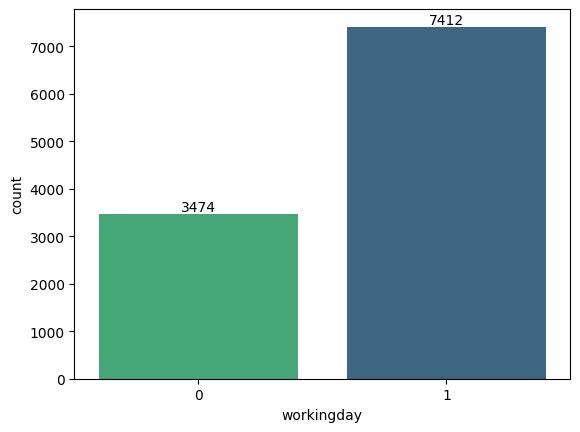

In [39]:
ax = sns.countplot(data=df, x='workingday', palette = 'viridis_r')
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
plt.show()

There are 7412 working days and 3474 non-working days in the data.

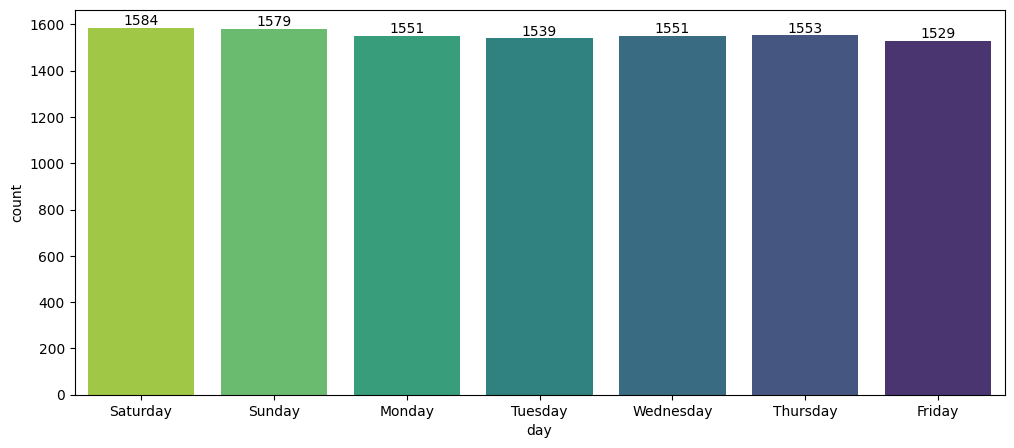

In [40]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data=df, x='day', palette = 'viridis_r')
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
plt.show()

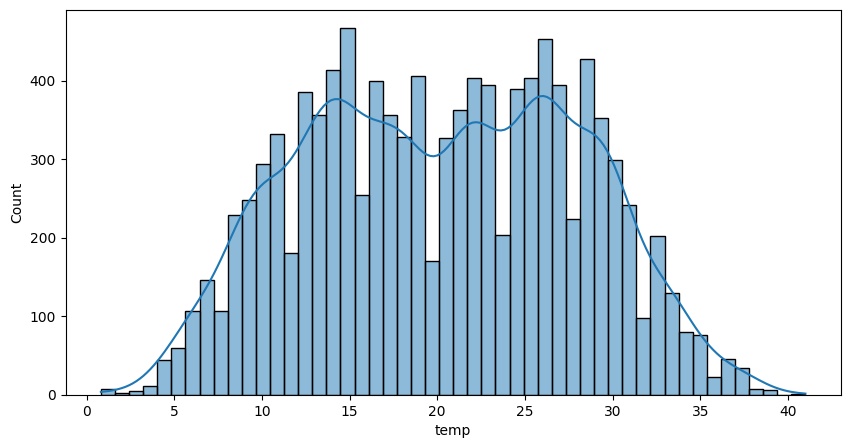

In [41]:
plt.figure(figsize=(10,5))
sns.histplot(data = df, x = 'temp', kde = True, bins = 50)
plt.show()   

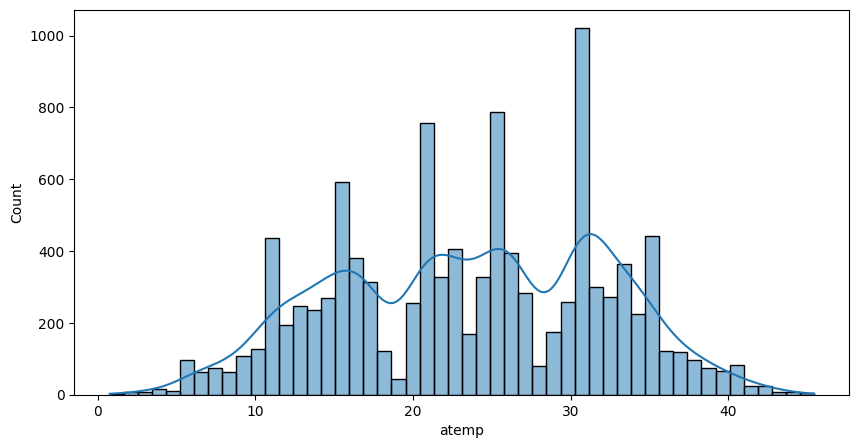

In [42]:
plt.figure(figsize=(10,5))
sns.histplot(data = df, x = 'atemp', kde = True, bins = 50)
plt.show()  

In [43]:
df['atemp'].mean() - df['temp'].mean()

3.424223

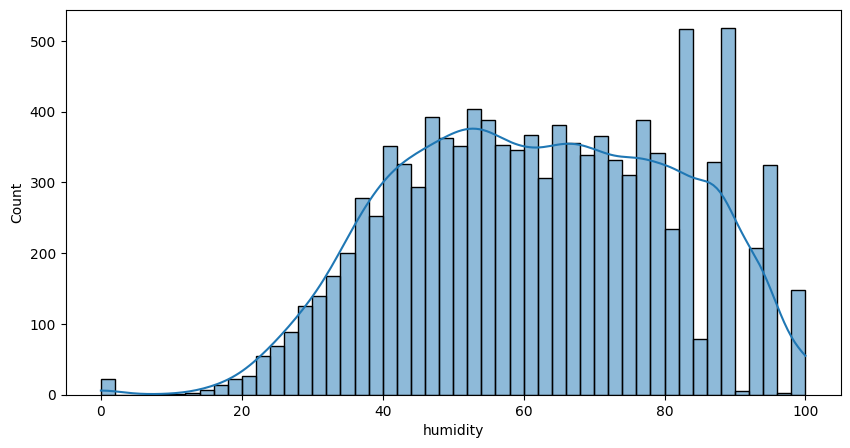

In [44]:
plt.figure(figsize=(10,5))
sns.histplot(data = df, x = 'humidity', kde = True, bins = 50)
plt.show()

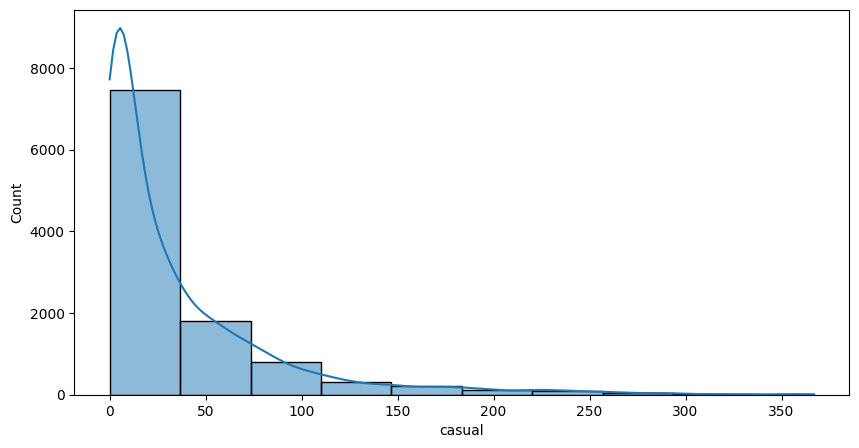

In [45]:
plt.figure(figsize=(10,5))
sns.histplot(data = df, x = 'casual', kde = True, bins = 10)
plt.show()

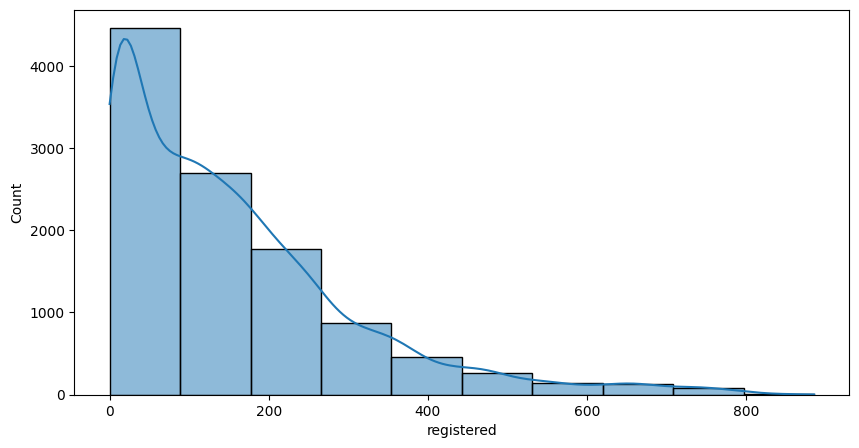

In [46]:
plt.figure(figsize=(10,5))
sns.histplot(data = df, x = 'registered', kde = True, bins = 10)
plt.show()

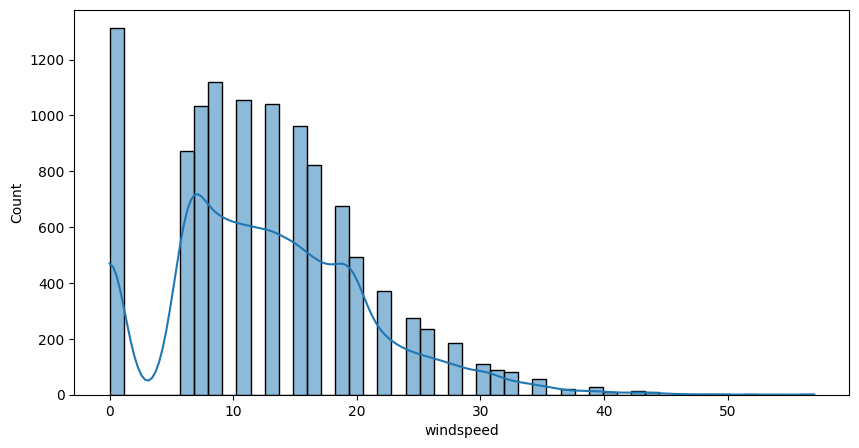

In [47]:
plt.figure(figsize=(10,5))
sns.histplot(data = df, x = 'windspeed', kde = True, bins = 50)
plt.show()

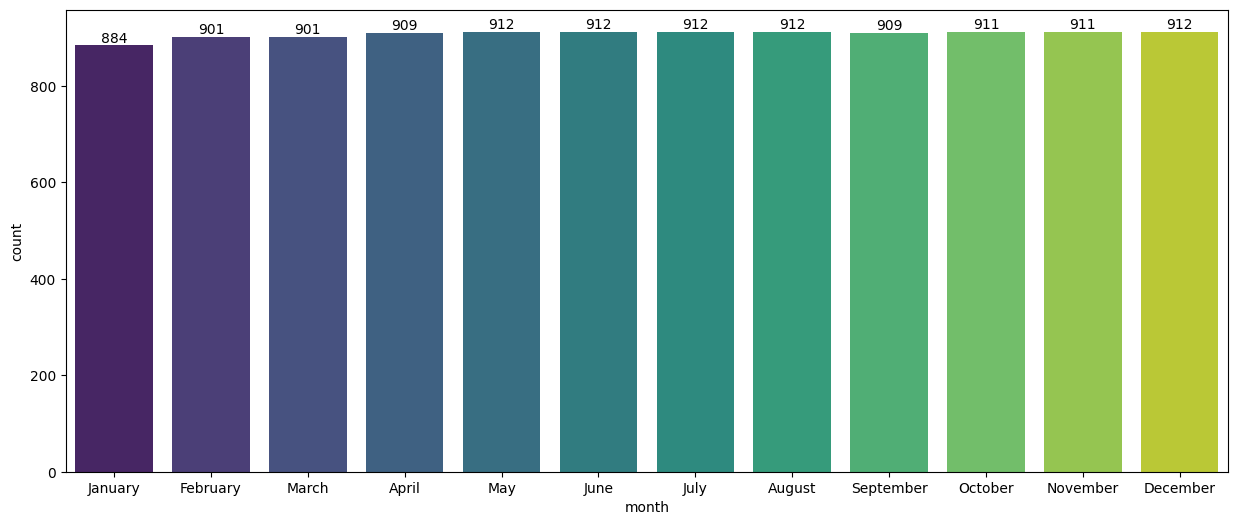

In [48]:
plt.figure(figsize=(15,6))
ax = sns.countplot(data = df, x = 'month', palette = 'viridis')
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
plt.show()

Bikes have been rented the most for months of May, June, July and August. 

#### *Outlier Detection*

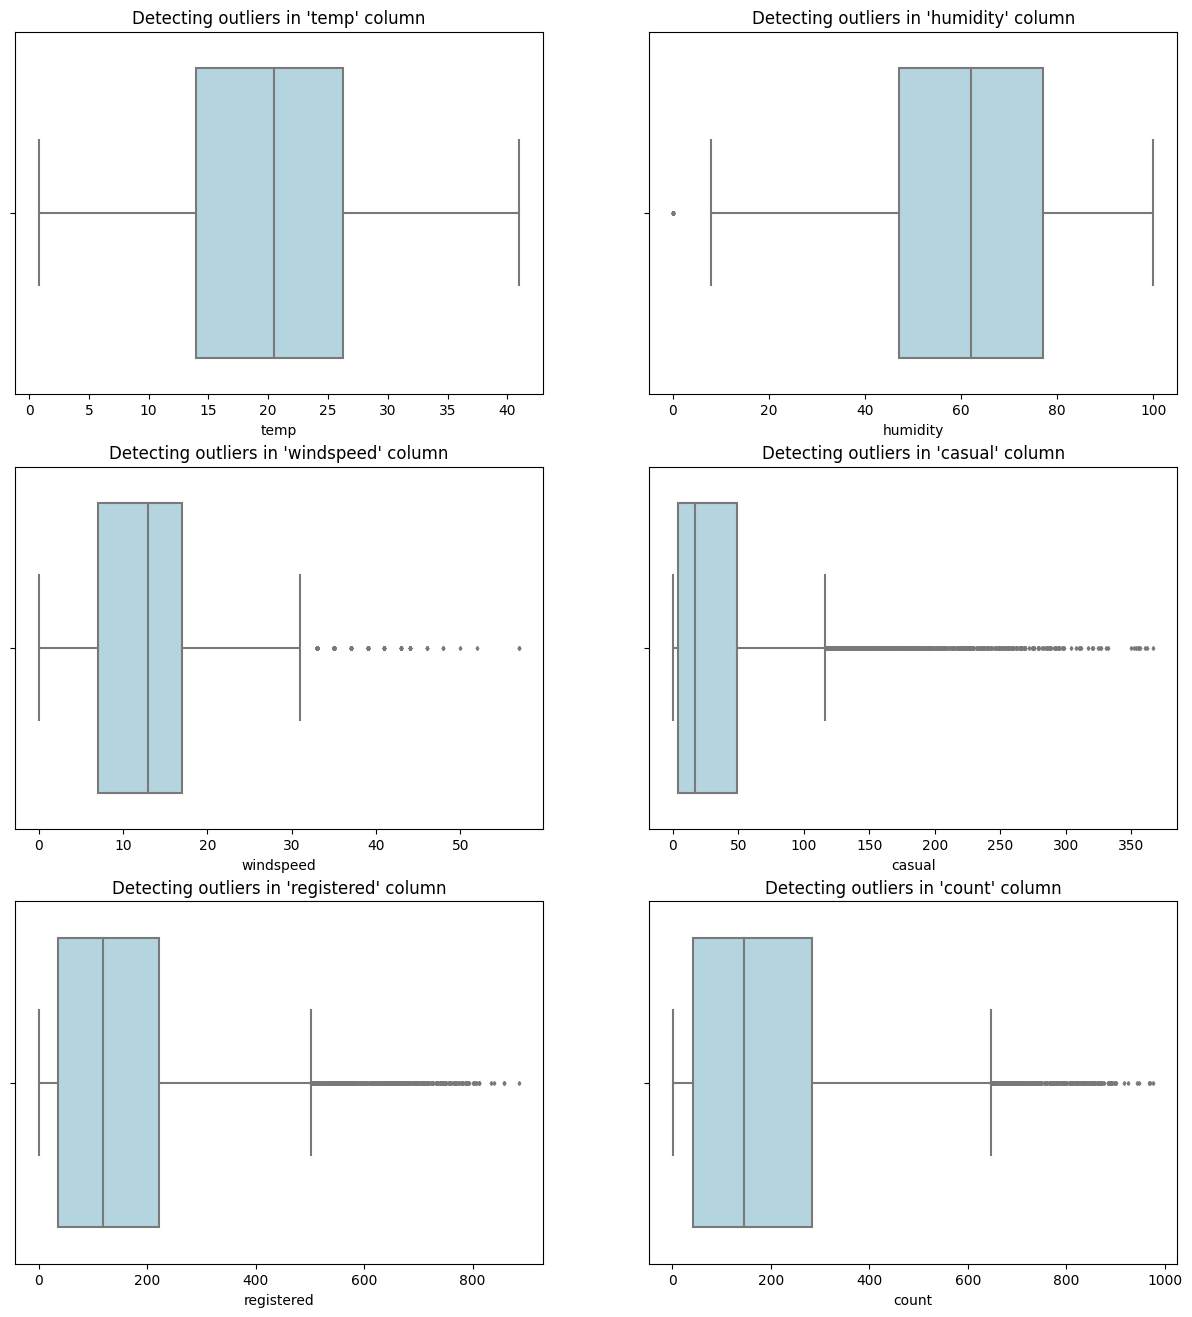

In [49]:
columns = ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
count = 1
plt.figure(figsize = (15, 16))
for i in columns:
    plt.subplot(3, 2, count)
    plt.title(f"Detecting outliers in '{i}' column")
    sns.boxplot(data = df, x = df[i], color = 'lightblue', fliersize = 2)
    plt.plot()
    count += 1

*Insights*
 - There is no outlier in the temp column and very few in humidity column.
 - There are many outliers present in the windspeed, casual, registered, count columns.

#### *Bivariate Analysis*

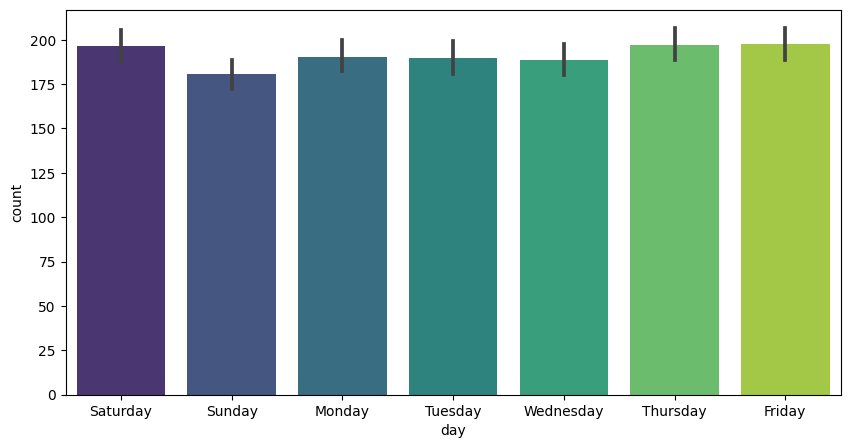

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='day', y='count',palette='viridis')
plt.show()

We can incur that Thursday, Friday and Saturday has most bikes rented.

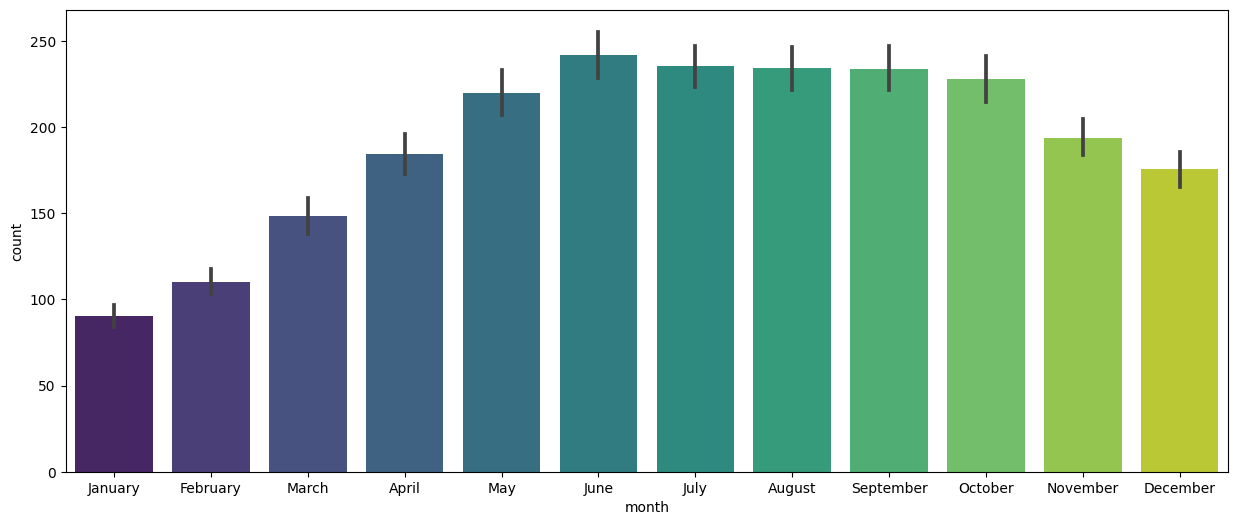

In [51]:
plt.figure(figsize=(15,6))
sns.barplot(data=df, x='month', y='count',palette='viridis')
plt.show()

July has the most bikes rented. Less number of bikes are rented during the start of the year and it gradually increases till June and stays steady till October. Then there's a gradual decline in renting.

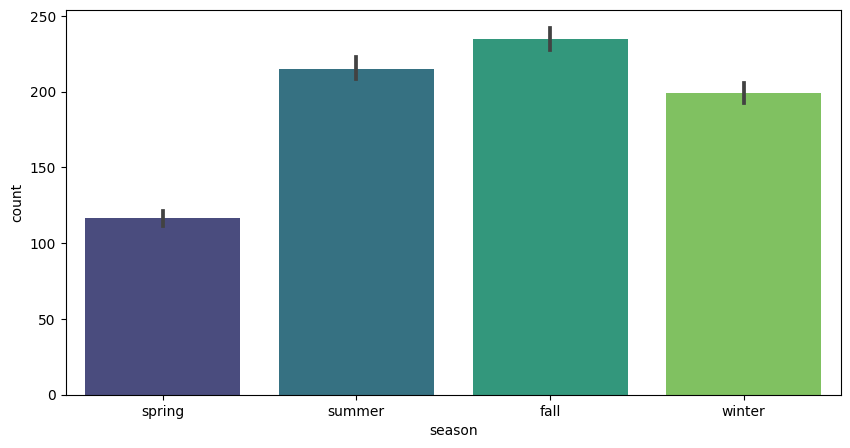

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='season', y='count',palette='viridis')
plt.show()

Most bikes are rented during Fall season.

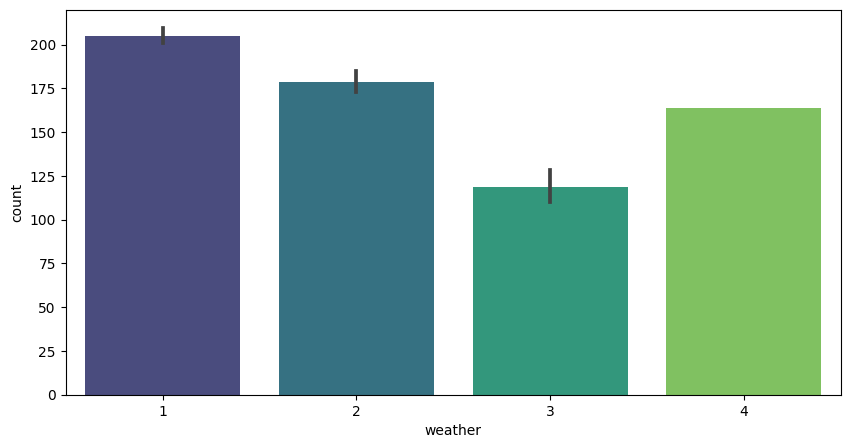

In [53]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='weather', y='count',palette='viridis')
plt.show()

Most bikes are rented in weather 1.

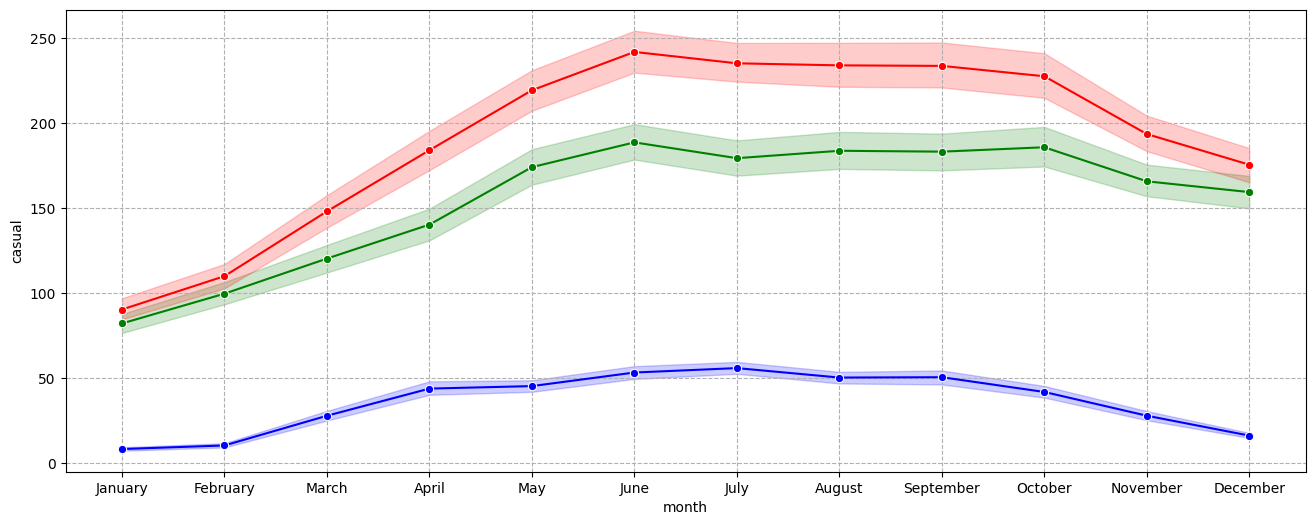

In [54]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df, x='month', y='casual',color='blue', marker='o')
sns.lineplot(data=df, x='month', y='registered',color='green', marker='o')
sns.lineplot(data=df, x='month', y='count',color='red', marker='o')
plt.grid(axis = 'both', linestyle = '--')

plt.show()

For every month across the year distribution of bikes for registered users is more than casual users.

[]

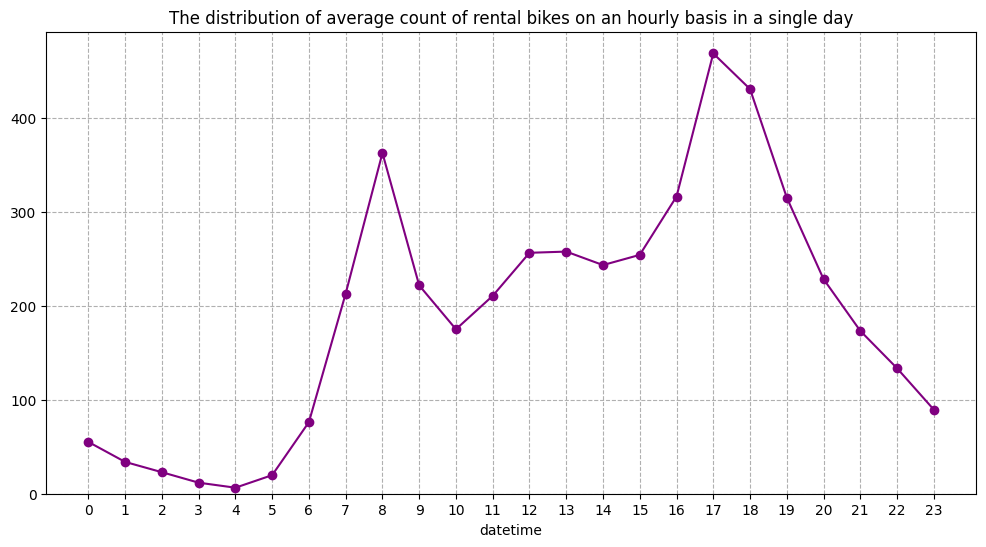

In [55]:
plt.figure(figsize = (12, 6))
plt.title("The distribution of average count of rental bikes on an hourly basis in a single day")
df.groupby(by = df['datetime'].dt.hour)['count'].mean().plot(kind = 'line', marker = 'o', color='purple')
plt.ylim(0,)
plt.xticks(np.arange(0, 24))
plt.grid(axis = 'both', linestyle = '--')
plt.plot()

We can observe that the distribution of bikes peak ar around 8:00am in the morning and 17:00pm (5:00pm) in the evening.

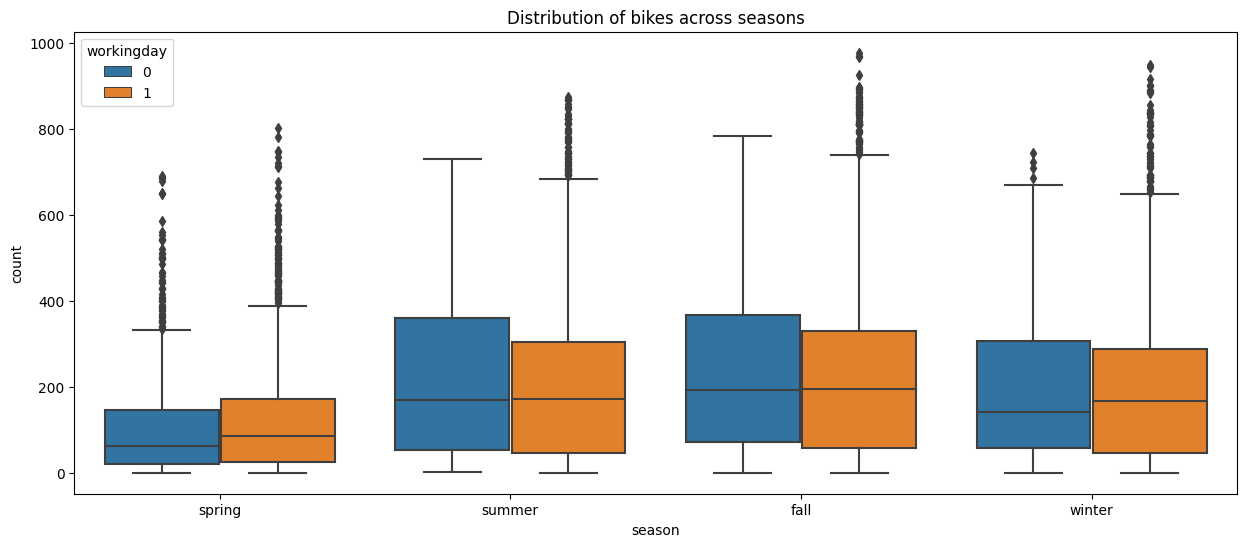

In [56]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df, x = 'season', y = 'count', hue = 'workingday')
plt.title('Distribution of bikes across seasons')
plt.show()

The count of total rental bikes is highest in the fall season, followed by the summer and winter seasons. It is generally low in the spring season.

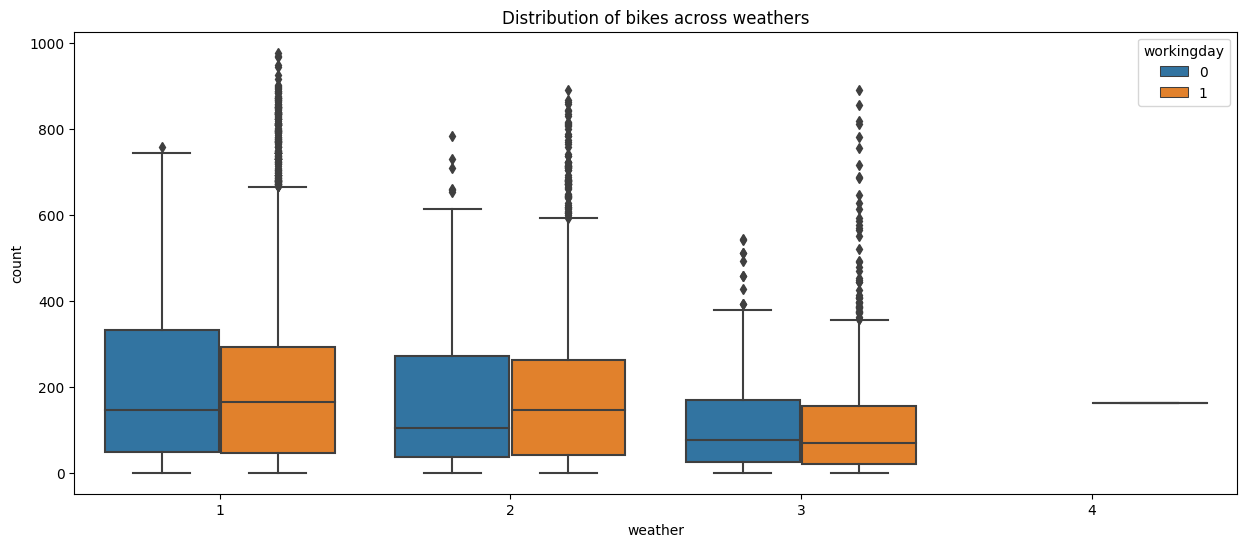

In [57]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df, x = 'weather', y = 'count', hue = 'workingday')
plt.title('Distribution of bikes across weathers')
plt.show()

The hourly count of total rental bikes is higher in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions. 

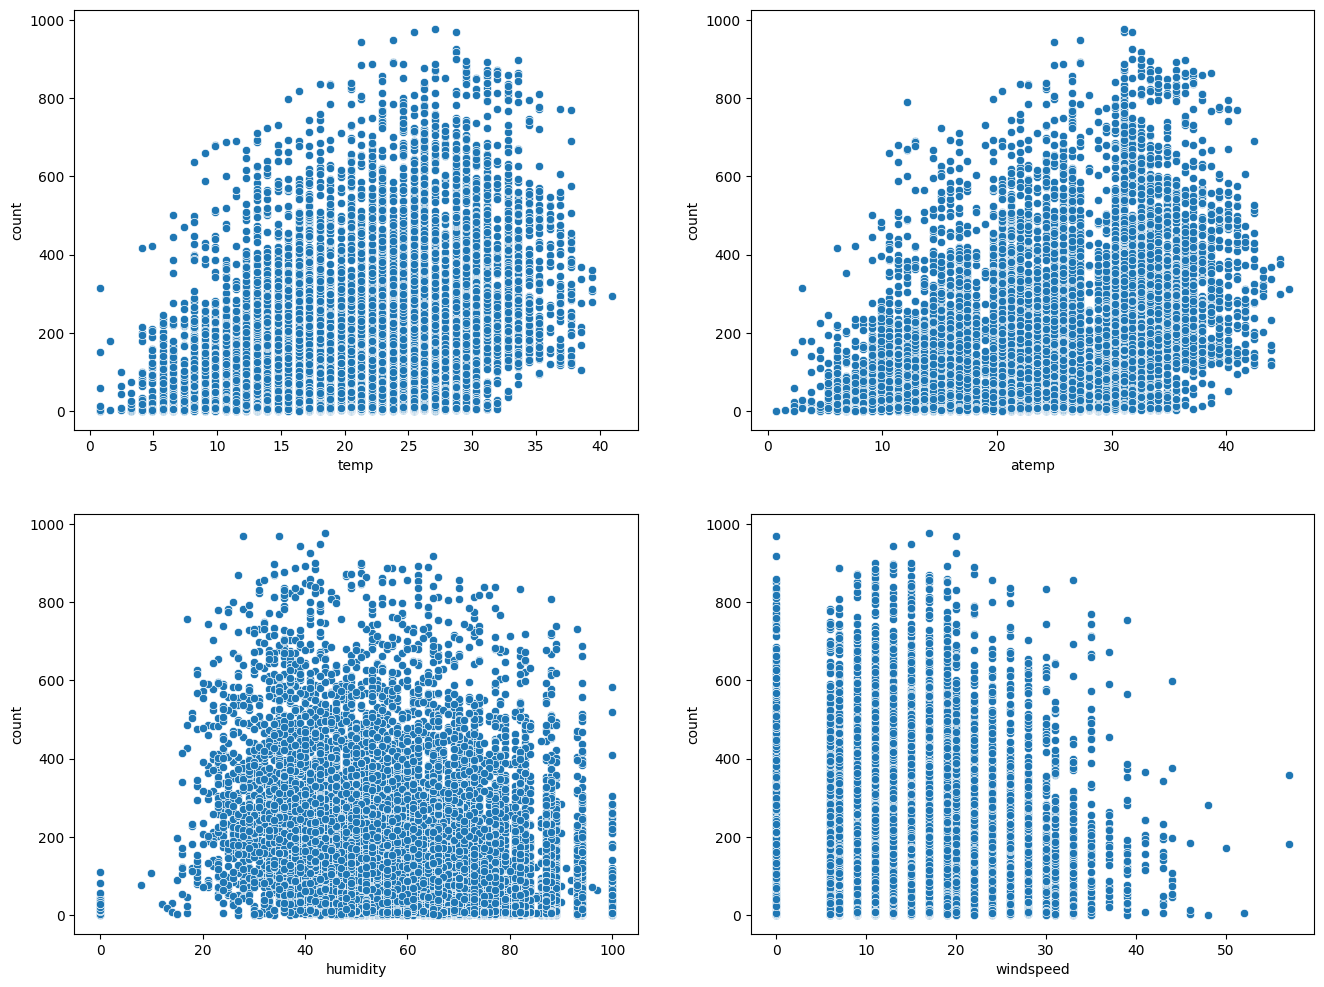

In [58]:
columns = ['temp', 'atemp', 'humidity', 'windspeed']
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.scatterplot(data=df, x=columns[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

*Insights*:
- Less bikes are rented when temp and atemp are less than 10 degrees.
- The number of bikes rented is very very low when humidity is less than 20.
- Less bikes are rented when windspeed is greater than 30.

#### *Hypothesis Testing*

###  To check if Working Day has an effect on the number of electric cycles rented

***STEP-1***: Set up Null and Alternate hypotheses
- `Null Hypothesis (H0)` : Working day has **no effect** on number of electric cycles rented
- `Alternate Hypothesis (Ha)` : Working day **has an effect** on number of electric cycles rented

***STEP-2***: Check assumptions of the test
- To check distributions visually using `Histogram `
- To check distribution of data using `Q-Q Plot` or by using statistical methods like `Shapiro-Wilk Test`
- To check for equality of variances using `Levene's Test`

***STEP-3***: Set a significance level (alpha value)
- Let `alpha=0.05`

***STEP-4***: Calculate test statistics
- We can perform `T-Test` if the assumptions for parametric test are met. If not, we can perform non-parametric tests equivalent to T-test such as `Kruksal-Wallis H Test` or `Mann-Whitney U Test`

***STEP-5***: Decision to accept or reject H0
- if p-value < alpha then  reject H0.
- if p-value > alpha then we fail to reject H0.


- Visual Test to check distribution using **Histogram**

In [59]:
workingday_df = df.loc[df['workingday']==1]
nonworkingday_df = df.loc[df['workingday']==0]

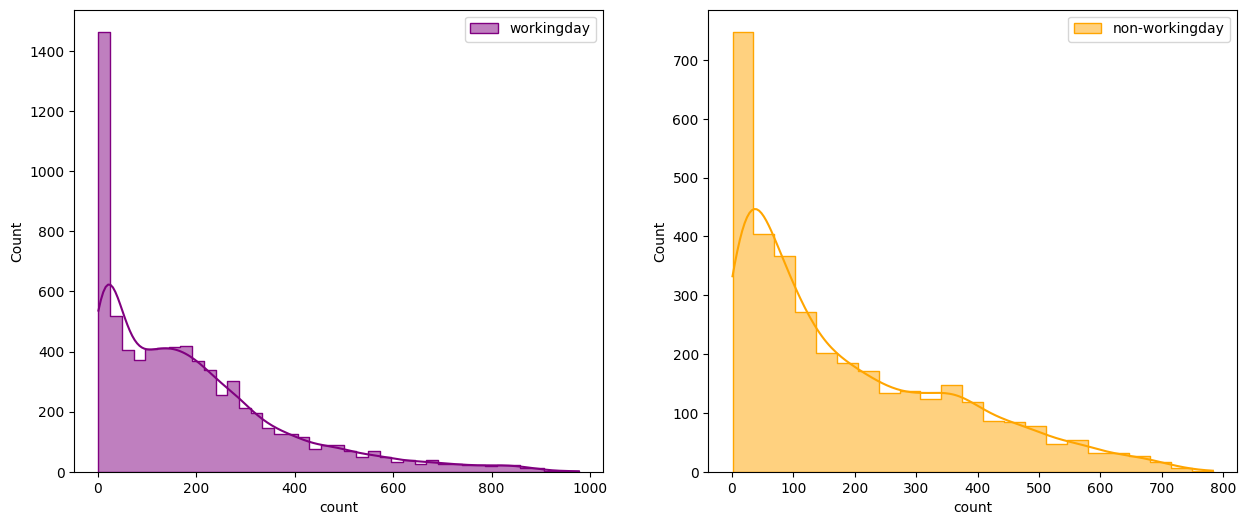

In [60]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(data = workingday_df, x='count', element = 'step', color = 'purple', kde = True, label = 'workingday')
plt.legend()

plt.subplot(1,2,2)
sns.histplot(data = nonworkingday_df, x='count', element = 'step', color = 'orange', kde = True, label = 'non-workingday')

plt.legend()
plt.show()

From the above plots we can observe that our data does not follow Normal distribution.

- Checking distribution of sample using **Q-Q Plot**

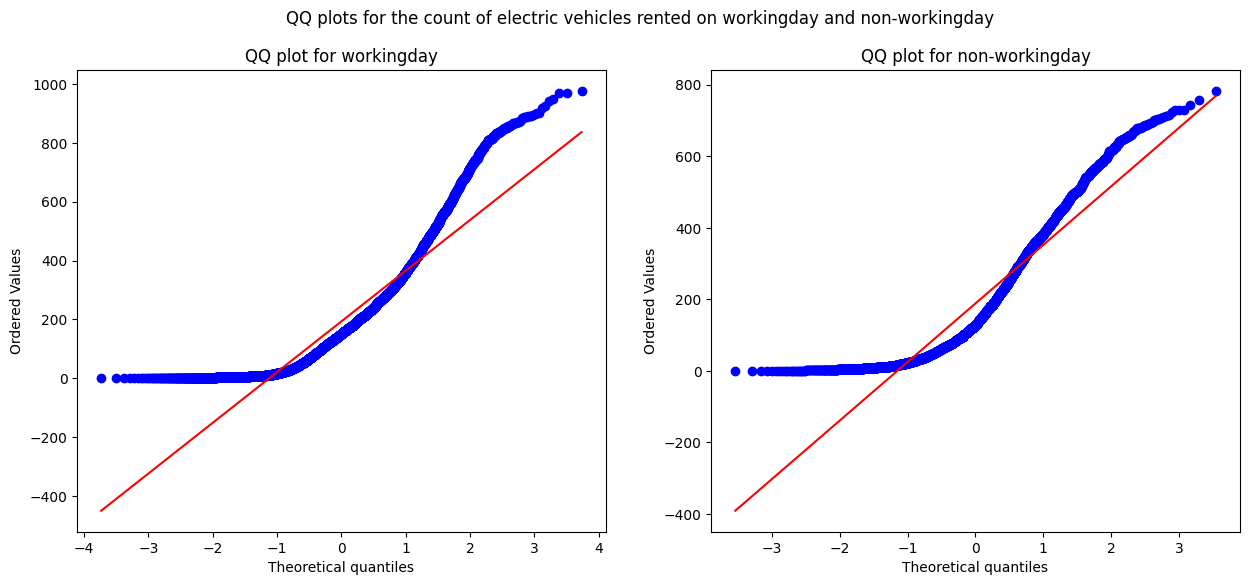

In [61]:
plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
spy.probplot(x=workingday_df['count'], plot = plt, dist = 'norm')
plt.title('QQ plot for workingday')

plt.subplot(1, 2, 2)
spy.probplot(x=nonworkingday_df['count'], plot = plt, dist = 'norm')
plt.title('QQ plot for non-workingday')

plt.suptitle('QQ plots for the count of electric vehicles rented on workingday and non-workingday')
plt.show()

From the above plots, we can clearly infer that the plots do not follow gaussian distribution.

- To check for equality of variances in samples, we apply **Levene's Test**

In [62]:
# Null Hypothesis H0: Samples have same variances.
# Alternate Hypothesis Ha: Samples do not have same variances.
# Assume alpha = 0.05
# Statistical model : Levene's Test for two independent samples.

stat, p_value = spy.levene(workingday_df['count'], nonworkingday_df['count'])
print(f'stat= {stat}, p-value= {p_value}')
if p_value < 0.05:
    print('The samples do not have same variances')
else:
    print('The samples have same variances ')

stat= 0.004972848886504472, p-value= 0.9437823280916695
The samples have same variances 


As observed from the above plots and tests, samples are not normally distributes, hence we cannot perform T-Test to test our hypothesis. Instead, we can use non-parametric test like **Mann-Wallis U Test** for testing the samples.

In [63]:
# Assuming alpha = 0.05
# Statistical model : Krusksal-Wallis H Test for two independent samples.

stat, p_value = spy.mannwhitneyu(workingday_df['count'], nonworkingday_df['count'])
print(f'stat= {stat}, p-value= {p_value}')
if p_value < 0.05:
    print('We reject the Null Hypothesis')
else:
    print('We fail to reject the Null Hypothesis')

stat= 12868495.5, p-value= 0.9679139953914079
We fail to reject the Null Hypothesis


After conducting several tests, we can conclude based on statistical facts that working days and non working days **`has no effect`** on renting of the electric bikes.

### To check if number of cycles rented are similar or different in different weather.

***STEP-1***: Set up Null and Alternate hypotheses
- `Null Hypothesis (H0)` : No. of cycles rented **are similar** in different weathers.
- `Alternate Hypothesis (Ha)` : No. of cycles rented **are different** in different weathers.

***STEP-2***: Check assumptions of the test
- To check distributions visually using `Histogram `
- To check distribution of data using `Q-Q Plot` or by using statistical methods like `Shapiro-Wilk Test`
- To check for equality of variances using `Levene Test`

***STEP-3***: Set a significance level (alpha value)
- Let `alpha=0.05`

***STEP-4***: Calculate test statistics
- We can perform `ANOVA` test as there are multiple samples to be tested upon. Through this test we will check whether the means of two or more independent samples are similar or significantly different.

***STEP-5***: Decision to accept or reject H0
- if p-value < alpha then  reject H0.
- if p-value > alpha then we fail to reject H0.


<Axes: xlabel='weather', ylabel='count'>

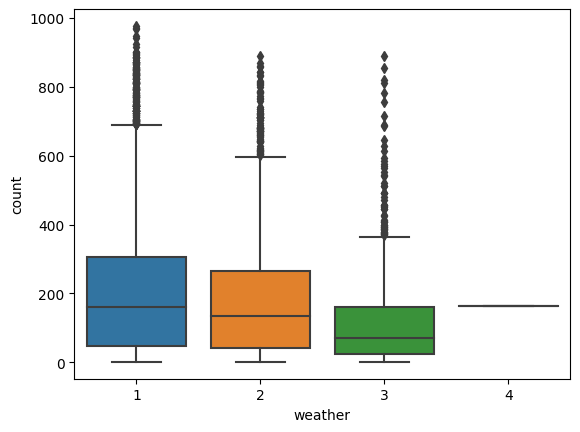

In [64]:
sns.boxplot(x=df['weather'], y=df['count'])

In [65]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [66]:
weather1 = df.loc[df['weather'] == 1]
weather2 = df.loc[df['weather'] == 2]
weather3 = df.loc[df['weather'] == 3]

Since there is only 1 data point present for weather 4, that is not enough information we can't perform tests on it. Hence it will be excluded from this test.

- To visually check the distribution using **Histogram**

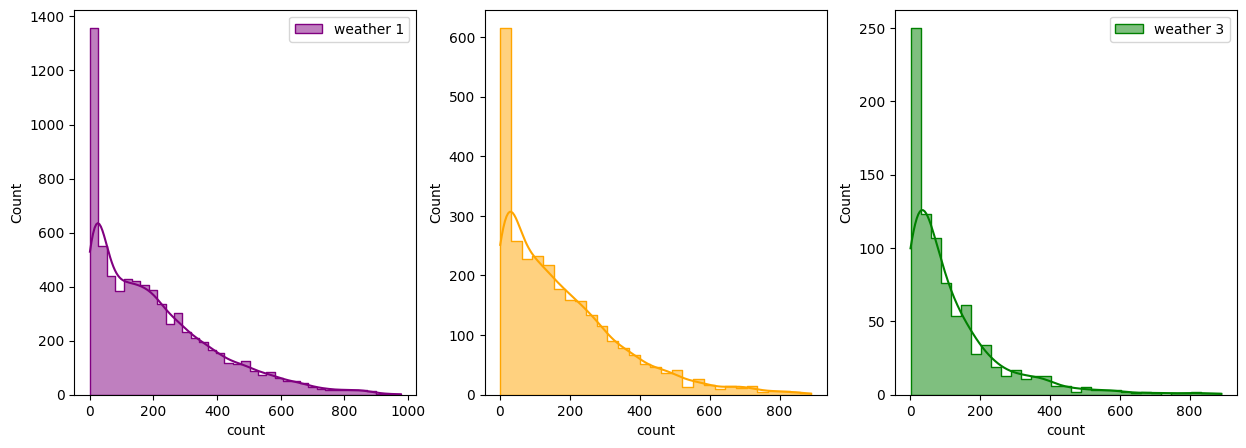

In [67]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data = weather1, x='count', element = 'step', color = 'purple', kde = True, label = 'weather 1')
plt.legend()

plt.subplot(1,3,2)
sns.histplot(data = weather2, x='count', element = 'step', color = 'orange', kde = True, label = 'weather 2')

plt.subplot(1,3,3)
sns.histplot(data = weather3, x='count', element = 'step', color = 'green', kde = True, label = 'weather 3')

plt.legend()
plt.show()

We can observe from above plots that the samples are not normally distributed.

- To check the distribution using **Q-Q Plot**

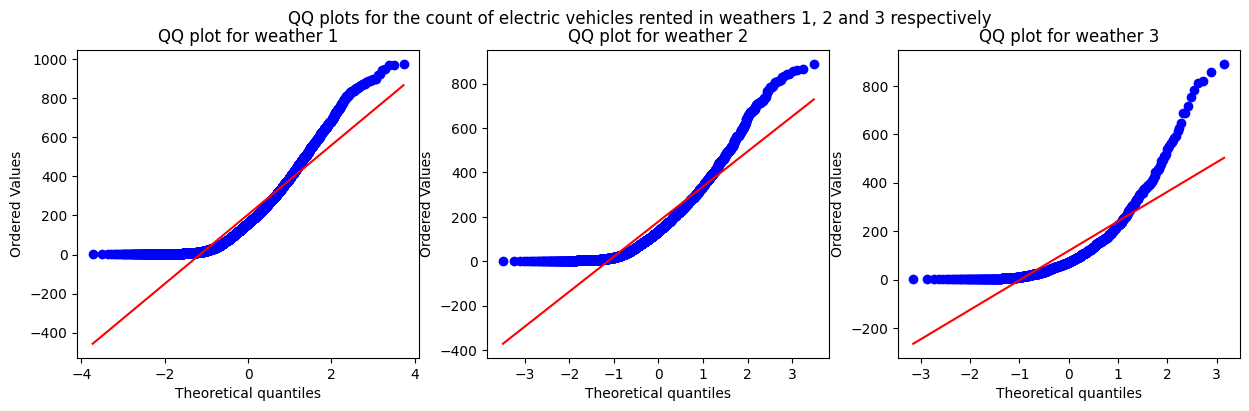

In [68]:
plt.figure(figsize = (15, 4))

plt.subplot(1, 3, 1)
spy.probplot(x=weather1['count'], plot = plt, dist = 'norm')
plt.title('QQ plot for weather 1')

plt.subplot(1, 3, 2)
spy.probplot(x=weather2['count'], plot = plt, dist = 'norm')
plt.title('QQ plot for weather 2')

plt.subplot(1, 3, 3)
spy.probplot(x=weather3['count'], plot = plt, dist = 'norm')
plt.title('QQ plot for weather 3')

plt.suptitle('QQ plots for the count of electric vehicles rented in weathers 1, 2 and 3 respectively')
plt.show()

It can be inferred from the above plot that the distributions do not follow normal distribution.

- Checking normality using **Shapiro-Wilk Test**

In [69]:
# H0 : weather1 sample will follow normal distribution
# Ha : weather1 sample will not follow normal distribution

stat, p_value = spy.shapiro(weather1.loc[:, 'count'].sample(800))
print(f'stat={stat}, p-vaue={p_value}')
if p_value < 0.05:
    print('The weather1 sample does not follow normal distribution')
else:
    print('The weather1 sample follows normal distribution')

stat=0.8916511535644531, p-vaue=2.898412543123868e-23
The weather1 sample does not follow normal distribution


In [70]:
# H0 : weather2 sample will follow normal distribution
# Ha : weather2 sample will not follow normal distribution

stat, p_value = spy.shapiro(weather2.loc[:, 'count'].sample(800))
print(f'stat={stat}, p-vaue={p_value}')
if p_value < 0.05:
    print('The weather2 sample does not follow normal distribution')
else:
    print('The weather2 sample follows normal distribution')

stat=0.8676754236221313, p-vaue=1.9386343027467874e-25
The weather2 sample does not follow normal distribution


In [71]:
# H0 : weather3 sample will follow normal distribution
# Ha : weather3 sample will not follow normal distribution

stat, p_value = spy.shapiro(weather3.loc[:, 'count'].sample(800))
print(f'stat={stat}, p-vaue={p_value}')
if p_value < 0.05:
    print('The weather3 sample does not follow normal distribution')
else:
    print('The weather3 sample follows normal distribution')

stat=0.7698968052864075, p-vaue=5.351642568135507e-32
The weather3 sample does not follow normal distribution


- To check for equality in variances of the samples using **Levene's Test**

In [72]:
# Null Hypothesis H0: Samples have same variances.
# Alternate Hypothesis Ha: Samples do not have same variances.
# Assume alpha = 0.05
# Statistical model : Levene's Test for two independent samples.

stat, p_value = spy.levene(weather1['count'].sample(800), weather2['count'].sample(800),weather3['count'].sample(800))
print(f'stat= {stat}, p-value= {p_value}')
if p_value < 0.05:
    print('The samples do not have same variances')
else:
    print('The samples have same variances ')

stat= 49.43366248094815, p-value= 9.165929175298126e-22
The samples do not have same variances


Since the assumptions aren't met for us to conduct f_oneway test, we will proceed with the **Kruksal-Wallis H Test**

In [73]:
# Assuming significance Level to be 0.05
# Statistical Model : Kruksal-Wallis H Test
alpha = 0.05
test_stat, p_value = spy.kruskal(weather1['count'], weather2['count'], weather3['count'])  
print(f'stat= {stat}, p-value= {p_value}')
if p_value < 0.05:
    print('We reject the Null Hypothesis')
else:
    print('We fail to reject the Null Hypothesis')

stat= 49.43366248094815, p-value= 3.122066178659941e-45
We reject the Null Hypothesis


##### From the above hypothesis, we can conclude that the number of electric bikes rented depend on weather and are different in different weathers.

### To check if number of cycles rented in different seasons is same or different

***STEP-1***: Set up Null and Alternate hypotheses
- `Null Hypothesis (H0)` : No. of cycles rented **are similar** in different seasons.
- `Alternate Hypothesis (Ha)` : No. of cycles rented **are different** in different seasons.

***STEP-2***: Check assumptions of the test
- To check distributions visually using `Histogram `
- To check distribution of data using `Q-Q Plot` or by using statistical methods like `Shapiro-Wilk Test`
- To check for equality of variances using `Levene's Test`

***STEP-3***: Set a significance level (alpha value)
- Let `alpha=0.05`

***STEP-4***: Calculate test statistics
- We can perform `ANOVA` test as there are multiple samples to be tested upon. Through this test we will check whether the means of two or more independent samples are similar or significantly different.

***STEP-5***: Decision to accept or reject H0
- if p-value < alpha then  reject H0.
- if p-value > alpha then we fail to reject H0.


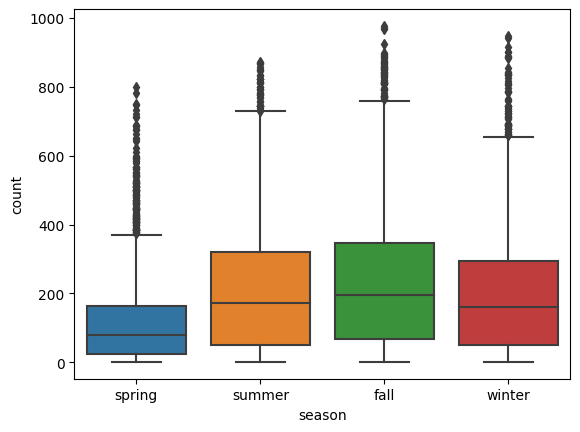

In [74]:
sns.boxplot(x=df['season'],y=df['count'])
plt.show()

In [75]:
df.season.value_counts()

season
winter    2734
summer    2733
fall      2733
spring    2686
Name: count, dtype: int64

In [76]:
spring = df.loc[df['season'] == 'spring']
summer = df.loc[df['season'] == 'summer']
fall = df.loc[df['season'] == 'fall']
winter = df.loc[df['season'] == 'winter']

- Checking the distribution visually using **Histogram**

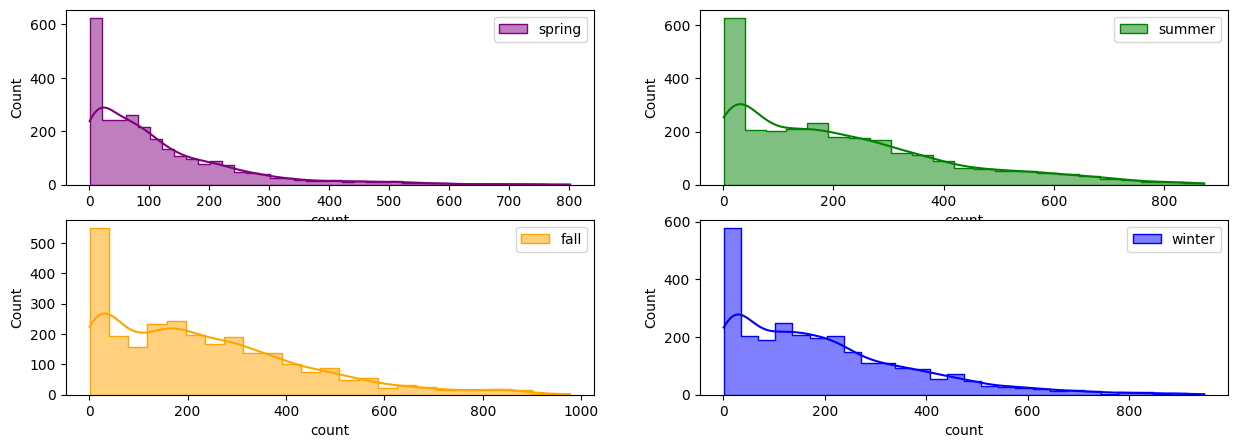

In [77]:
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.histplot(data = spring, x='count', element = 'step', color = 'purple', kde = True, label = 'spring')
plt.legend()

plt.subplot(2,2,2)
sns.histplot(data = summer, x='count', element = 'step', color = 'green', kde = True, label = 'summer')
plt.legend()

plt.subplot(2,2,3)
sns.histplot(data = fall, x='count', element = 'step', color = 'orange', kde = True, label = 'fall')
plt.legend()

plt.subplot(2,2,4)
sns.histplot(data = winter, x='count', element = 'step', color = 'blue', kde = True, label = 'winter')
plt.legend()

plt.show()

From the above plots we can observe that the data is not distributed normally.

- Checking the distribution using **Q-Q Plot**

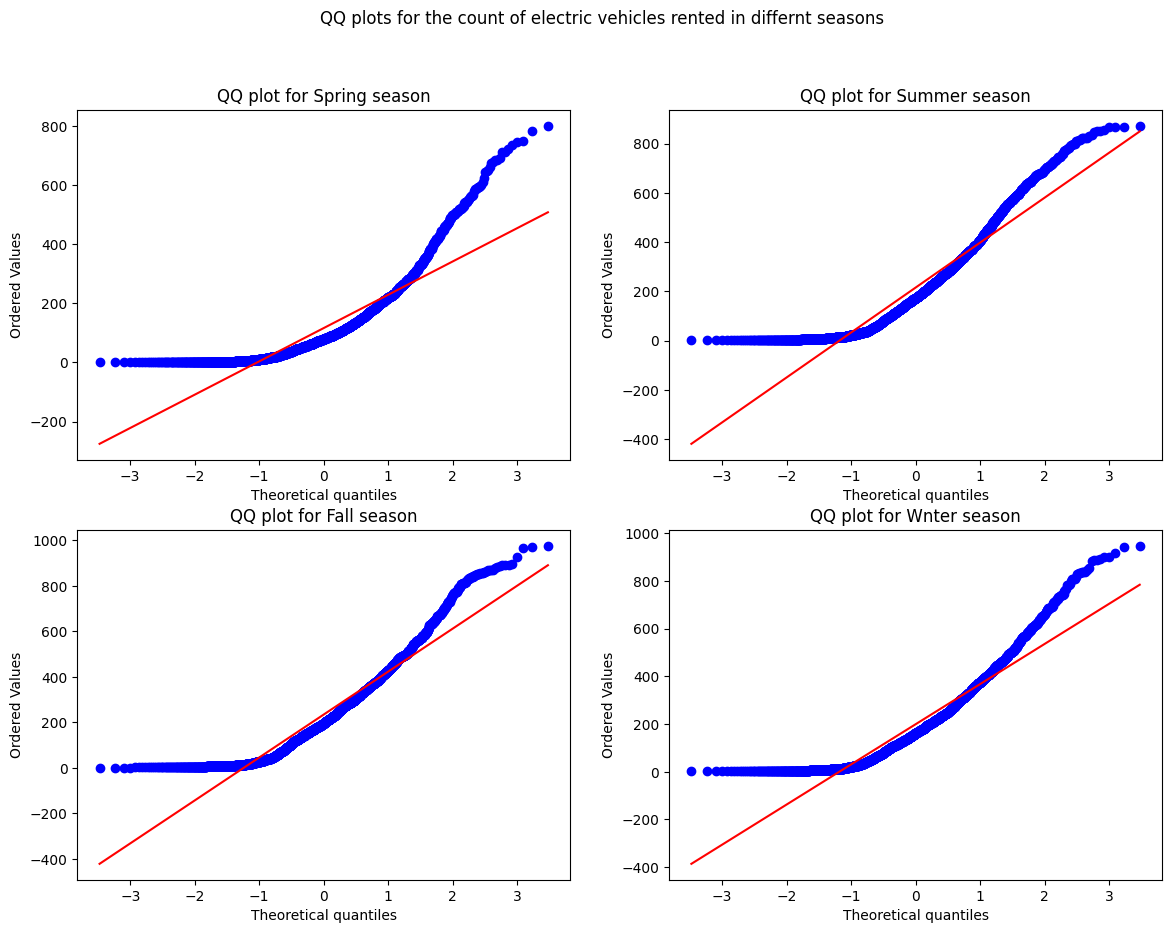

In [78]:
plt.figure(figsize = (14, 10))

plt.subplot(2, 2, 1)
spy.probplot(x=spring['count'], plot = plt, dist = 'norm')
plt.title('QQ plot for Spring season')

plt.subplot(2, 2, 2)
spy.probplot(x=summer['count'], plot = plt, dist = 'norm')
plt.title('QQ plot for Summer season')

plt.subplot(2, 2, 3)
spy.probplot(x=fall['count'], plot = plt, dist = 'norm')
plt.title('QQ plot for Fall season')

plt.subplot(2, 2, 4)
spy.probplot(x=winter['count'], plot = plt, dist = 'norm')
plt.title('QQ plot for Wnter season')

plt.suptitle('QQ plots for the count of electric vehicles rented in differnt seasons')
plt.show()

From the above plots we can observe that the data does not follow normal distribution.

- Checking normality using the **Shapiro-Wilk test**.

In [79]:
# H0 : spring sample will follow normal distribution
# Ha : spring sample will not follow normal distribution

stat, p_value = spy.shapiro(spring['count'].sample(2500))
print(f'stat={stat}, p-vaue={p_value}')
if p_value < 0.05:
    print('The sample from spring season data does not follow normal distribution')
else:
    print('The sample from spring season data follows normal distribution')

stat=0.8035247325897217, p-vaue=0.0
The sample from spring season data does not follow normal distribution


In [80]:
# H0 : summer sample will follow normal distribution
# Ha : summer sample will not follow normal distribution

stat, p_value = spy.shapiro(summer['count'].sample(2500))
print(f'stat={stat}, p-vaue={p_value}')
if p_value < 0.05:
    print('The sample from summer season data does not follow normal distribution')
else:
    print('The sample from summer season data follows normal distribution')

stat=0.8970498442649841, p-vaue=4.866660801413531e-38
The sample from summer season data does not follow normal distribution


In [81]:
# H0 : fall sample will follow normal distribution
# Ha : fall sample will not follow normal distribution

stat, p_value = spy.shapiro(fall['count'].sample(2500))
print(f'stat={stat}, p-vaue={p_value}')
if p_value < 0.05:
    print('The sample from fall season data does not follow normal distribution')
else:
    print('The sample from fall season data follows normal distribution')

stat=0.9137166738510132, p-vaue=1.5258893860749598e-35
The sample from fall season data does not follow normal distribution


In [82]:
# H0 : winter sample will follow normal distribution
# Ha : winter sample will not follow normal distribution

stat, p_value = spy.shapiro(winter['count'].sample(2500))
print(f'stat={stat}, p-vaue={p_value}')
if p_value < 0.05:
    print('The sample from winter season data does not follow normal distribution')
else:
    print('The sample from winter season data follows normal distribution')

stat=0.8960182666778564, p-vaue=3.4967133073713604e-38
The sample from winter season data does not follow normal distribution


From the above test we can incur that the samples for each season do not follow normal distribution.

- To check for equality in variances of samples using **Levene's test**

In [83]:
# Null Hypothesis H0: Samples have same variances.
# Alternate Hypothesis Ha: Samples do not have same variances.
# Assume alpha = 0.05
# Statistical model : Levene's Test for two independent samples.

stat, p_value = spy.levene(spring['count'].sample(2500), summer['count'].sample(2500),fall['count'].sample(2500),winter['count'].sample(2500))
print(f'stat= {stat}, p-value= {p_value}')
if p_value < 0.05:
    print('The samples do not have same variances')
else:
    print('The samples have same variances ')

stat= 173.93030417699154, p-value= 6.357262480927271e-110
The samples do not have same variances


Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., **Kruskal-Wallis H-test** for independent samples.

In [84]:
# Assuming significance Level to be 0.05
# Statistical Model : Kruksal-Wallis H Test
alpha = 0.05
test_stat, p_value = spy.kruskal(spring['count'], summer['count'], fall['count'], winter['count'])  
print(f'stat= {stat}, p-value= {p_value}')
if p_value < 0.05:
    print('We reject the Null Hypothesis')
else:
    print('We fail to reject the Null Hypothesis')

stat= 173.93030417699154, p-value= 2.479008372608633e-151
We reject the Null Hypothesis


From the above hypothesis testing we can conclude that the number of electric bikes rented are different in different seasons

### To check if weather is dependent on season

***STEP-1***: Set up Null and Alternate hypotheses
- `Null Hypothesis (H0)` : Weather is **independent** of seasons.
- `Alternate Hypothesis (Ha)` : Weather is **dependednt** on seasons.

***STEP-2***: Check assumptions of the test
- Data should be categorical. The categories of the variables must be mutually exclusive.
- The data in the cells should be frequencies, or counts of cases.
- The study groups must be independent. This means that a different test must be used if the two groups are related.

***STEP-3***: Set a significance level (alpha value)
- Let `alpha=0.05`

***STEP-4***: Calculate test statistics
- For this hypothesis testing we will be applying `Chi-Square Test` on the two categorical variables.

***STEP-5***: Decision to accept or reject H0
- if p-value < alpha then  reject H0.
- if p-value > alpha then we fail to reject H0.


- Contingency Table for the test.

In [85]:
contingency_table = pd.crosstab(index = df['season'], 
                          columns = df['weather'], 
                          values = df['count'], 
                          aggfunc = np.sum)
contingency_table

weather,1,2,3,4
season,,,,
spring,223009,76406,12919,164
summer,426350,134177,27755,0
fall,470116,139386,31160,0
winter,356588,157191,30255,0


In the above table we can observe that the data for weather 4 contains null values. So we can't use that column for the test.

In [86]:
contingency_table = pd.crosstab(index = df['season'], 
                          columns = df.loc[df['weather'] != 4, 'weather'], 
                          values = df['count'], 
                          aggfunc = np.sum)
contingency_table

weather,1,2,3,4
season,,,,
spring,223009,76406,12919,0
summer,426350,134177,27755,0
fall,470116,139386,31160,0
winter,356588,157191,30255,0


In [87]:
# to change the con_table into numpy array.
contingency_table = contingency_table.to_numpy()[:,:3]
contingency_table

array([[223009,  76406,  12919],
       [426350, 134177,  27755],
       [470116, 139386,  31160],
       [356588, 157191,  30255]])

- Applying the **Chi-Square test**

In [89]:
# Assuming significance Level to be 0.05
# Statistical Model : Chi-Square Test

alpha = 0.05
stat, p_value, dof, expected = spy.chi2_contingency(observed = contingency_table)
print('Test Statistic =', stat)
print('p value =', p_value)
print("Expected : '\n'", expected)

if p_value < alpha:
    print('We reject the Null Hypothesis')
else:
    print('We fail to reject the Null Hypothesis')


Test Statistic = 10838.372332480214
p value = 0.0
Expected : '
' [[221081.86259035  75961.44434981  15290.69305984]
 [416408.3330293  143073.60199337  28800.06497733]
 [453484.88557396 155812.72247031  31364.39195574]
 [385087.91880639 132312.23118651  26633.8500071 ]]
We reject the Null Hypothesis


From the above hypothesis testing we can conclude that statistically there is a dependency of weather on season.

[]

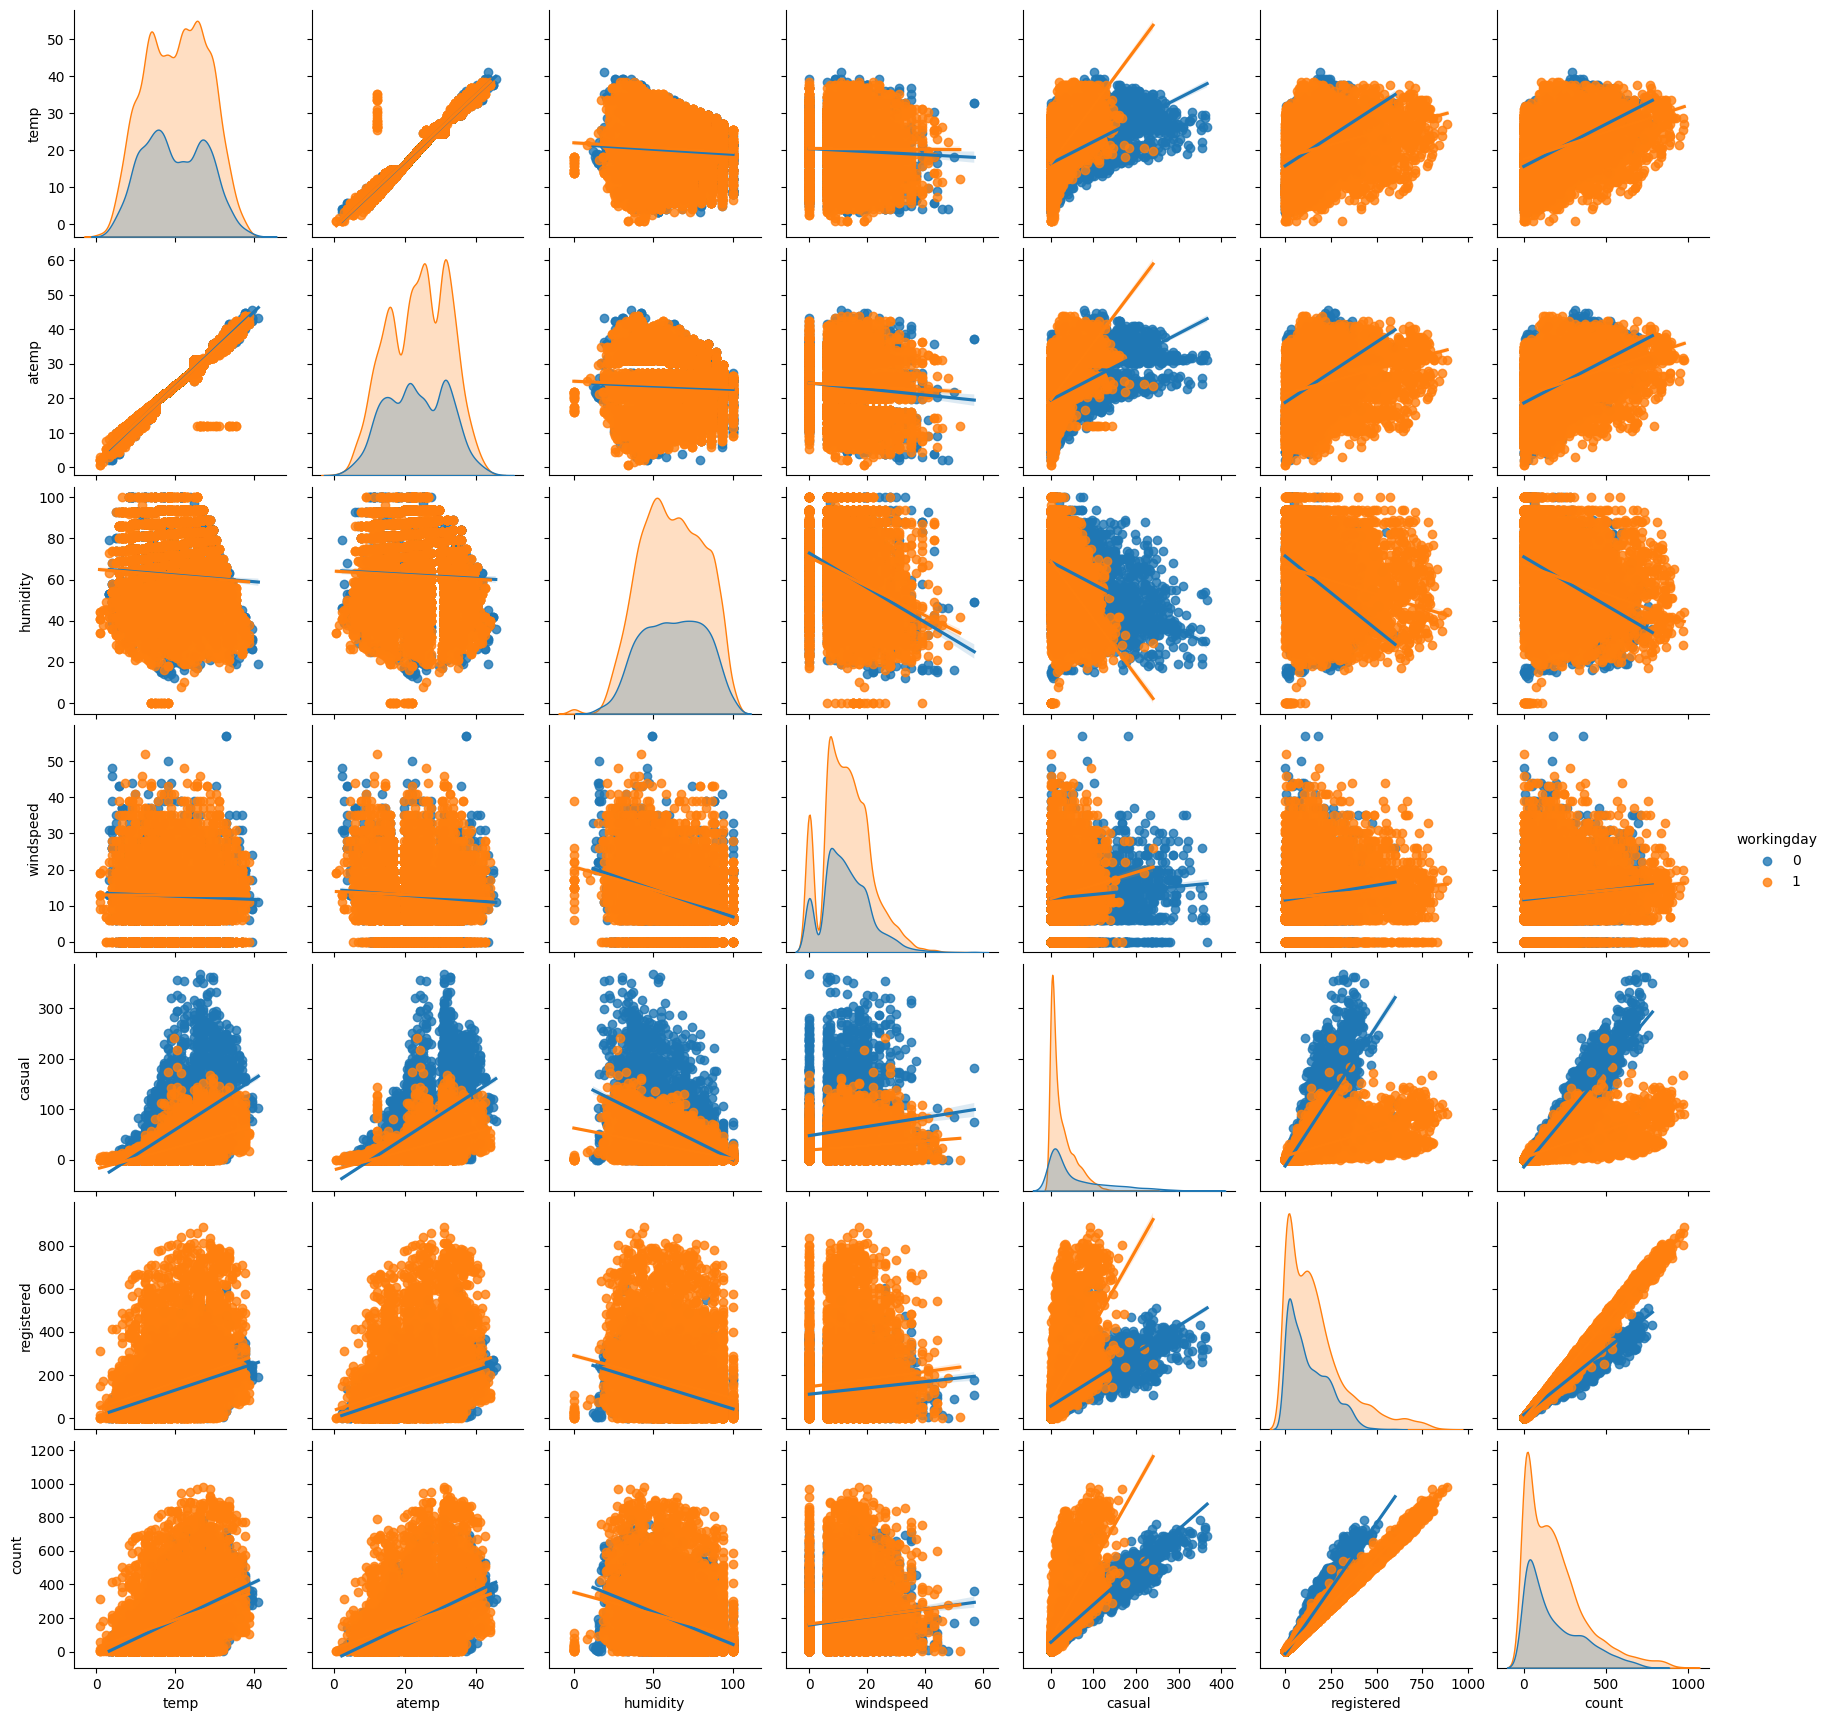

In [90]:
sns.pairplot(data = df, kind = 'reg', hue = 'workingday')
plt.plot()

## FINAL INSIGHTS

- The provided data spans from 2011-01-01 00:00:00 to 2012-12-19 23:00:00, with a total duration of 718 days 23:00:00.
- Out of every 100 users, approximately 19 are categorized as casual users, while the remaining 81 are registered users.
- The average total hourly count of rental bikes in 2011 stands at 144, and in 2012, it increases to 239.
- In summer and fall seasons more bikes are rented as compared to other seasons.
- The lowest average hourly bike count occurs in January, February and March.
- It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
- Throughout the day, there is a clear fluctuation in bike count. There seems to be more bike renting in the morning when office hours begin till evening, then a gradual decrease during the night and lowest count in the early morning hours.
- Bike counts are lowest when temperature is below 10 degrees Celcius. More than 80% of the time, the temperature remains below 28 degrees Celsius. 
- Windspeed data shows values below 20 for over 85% of the total records. And less bikes are rented when windspeed is more than 35.
- The highest hourly bike rental counts occur during clear and cloudy weather, followed by misty weather and rainy conditions. Records for extreme weather conditions are minimal.
- The mean hourly bike rental counts do not significantly differ between working and non-working days.
- A statistically significant relationship exists between weather conditions and the season, as evidenced by the hourly total bike rentals.
- The hourly total bike rentals exhibit statistical differences across various weather conditions.
- The hourly total bike rentals significantly vary across different seasons.

## BUSINESS RECOMMENDATIONS

- **Customer Profiling**: With approximately 81% of users being registered and 19% casual, Yulu can fine-tune its marketing and communication approaches accordingly. Implementing loyalty programs, exclusive offers for casual customers to increase conversion rates, and personalized recommendations for registered users to foster repeat business can help.

- **Seasonal Bike Maintenance**: Allocate resources for seasonal bike maintenance. Conduct comprehensive checks on the bike fleet before peak seasons to ensure optimal condition. Regularly inspect and service bikes throughout the year to minimize breakdowns and maximize customer satisfaction. Upgrading bikes like adding a charging port or a screen that shows GPS maps can help.

- **Seasonal Marketing**: In response to the observed seasonal fluctuations in bike rentals, Yulu can tailor its marketing strategies accordingly. Consider offering seasonal discounts or exclusive packages to entice more customers during these periods.

- **Optimize Inventory**: Scrutinize demand patterns across different months and adjust inventory levels accordingly. During months with lower rental counts, such as January, February, and March, optimize bike inventory to prevent overstocking. Conversely, during peak months, ensure an adequate supply of bikes to meet heightened demand.

- **Collaboration with Weather Services**: Explore partnerships with weather services to offer real-time weather updates and forecasts to potential customers. Incorporate weather data into marketing campaigns or the rental app to showcase ideal biking conditions, attracting users who prefer specific weather conditions.

- **Customer Feedback and Reviews**: Encourage customers to provide feedback and reviews about their biking experiences. Gathering feedback can help identify areas for improvement, understand customer preferences, and tailor services to better meet customer expectations.

- **Social Media Marketing**: Leverage social media platforms to promote electric bike rental services. Share captivating visuals of biking experiences in various weather conditions, showcase customer testimonials, and engage potential customers through interactive posts and contests. Utilize targeted advertising campaigns to reach specific customer segments and drive bookings.

- **Special Occasion Discounts**: As Yulu focuses on sustainability and reducing vehicular pollution, consider offering special discounts on occasions such as Zero Emissions Day (September 21st), National Clean Energy Week, Earth Day (April 22nd), and World Environment Day (June 5th) to attract new users and align with the company's vision and mission.